# EDA Profundo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Lee el archivo JSON como texto
with open("C:/Users/leand/Desktop/Proyecto Final/Proyecto-Final-HENRY-Big-Data/Tablas/restaurantes.json", "r") as file:
    json_text = file.read()

# Divide el texto en objetos JSON individuales
json_objects = json_text.split("\n")

# Convierte los objetos JSON en una lista de diccionarios
data_list = [json.loads(obj) for obj in json_objects if obj.strip()]

# Crea un DataFrame a partir de la lista de diccionarios
restaurantes = pd.DataFrame(data_list)

In [3]:
restaurantes.head(1)

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
0,0,51,None,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Cape Seafood Shack,603 Del Prado Blvd S,26.641377,-81.940545,5.0,1,Normally open


Vemos los restaurantes con mas sucursales (segun su nombre)

In [4]:
restaurantes['nombre'].value_counts()[restaurantes['nombre'].value_counts() > 45]

nombre
Subway                    532
Circle K                  264
Starbucks                 251
McDonald's                200
Dunkin'                   177
Domino's Pizza            132
Walgreens                 132
Taco Bell                 117
Wawa                      114
Shell                     112
7-Eleven                  108
Wendy's                   105
Papa John's Pizza         101
Burger King                99
Pizza Hut                  96
Jimmy John's               80
CVS                        76
Smoothie King              71
Chick-fil-A                61
Baskin-Robbins             56
Kangaroo Express           53
Pizza Hut Express          51
Tropical Smoothie Cafe     48
Little Caesars Pizza       46
Name: count, dtype: int64

Vemos las ciudades que tengan mas restaurantes

In [5]:
restaurantes['id_ciudad'].value_counts()[restaurantes['id_ciudad'].value_counts() > 220]

id_ciudad
370    1297
242    1253
151    1246
212    1046
285     871
165     617
31      591
171     578
69      536
271     510
356     430
361     420
377     377
62      340
37      316
113     305
111     275
243     273
288     261
258     253
121     241
337     240
32      240
389     221
Name: count, dtype: int64

Vemos el estado de los locales

In [6]:
restaurantes['estado'].value_counts()

estado
Normally open         22586
Permanently closed     3596
Temporarily closed      254
Name: count, dtype: int64

Cuales son los los puntajes de rating mas comunes

In [7]:
restaurantes['avg_rating'].value_counts()

avg_rating
4.0    3753
4.5    3060
3.5    2805
3.0    1909
5.0    1512
4.4    1097
2.5    1092
4.3    1070
4.6    1027
4.7     938
4.8     926
4.2     892
4.1     813
4.9     670
2.0     653
3.9     619
3.8     592
3.7     523
3.6     417
1.5     352
3.3     303
3.4     286
3.2     200
3.1     167
2.8     118
2.9     105
1.0      99
2.7      83
2.3      74
2.6      73
2.4      55
2.2      41
2.1      37
1.7      17
1.8      17
1.9      15
1.6      12
1.3       5
1.4       5
1.2       3
1.1       1
Name: count, dtype: int64

Vemos el top 5 de locales con mas reviews_count

In [8]:
restaurantes.nlargest(5, 'reviews_count')

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
10261,10383,354,None,0x88e4279668c1a2f1:0x8c1cd12f09764aeb,"Harry's Seafood, Bar & Grille",46 Avenida Menendez,29.893406,-81.311305,4.6,8116,Normally open
9447,9546,111,None,0x88d9a031f44c35d5:0xd9e6f545d08ec667,Everglades Holiday Park Airboat Tours and Rides,21940 Griffin Rd,26.060475,-80.444703,4.4,7664,Normally open
9710,9816,308,None,0x8890a84997a3ca01:0xb5c7b6fa2bbf6d9e,Flora-Bama,17401 Perdido Key Dr,30.281301,-87.518178,4.5,7471,Normally open
10210,10330,285,None,0x88e77ea893b83cbf:0x8c5b51fd6bb065be,The Cheesecake Factory,4200 Conroy Rd,28.486003,-81.431334,4.5,7470,Normally open
23457,23632,69,ac1AeYqs8Z4_e2X5M3if2A,None,Oceana Grill,739 Conti St,29.956231,-90.067563,4.0,7400,Normally open


Los 5 locales con mejor raiting

In [9]:
restaurantes.nlargest(5, 'avg_rating')

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
0,0,51,None,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Cape Seafood Shack,603 Del Prado Blvd S,26.641377,-81.940545,5.0,1,Normally open
1,1,312,None,0x88c2e4e34f1ed783:0x76c5da381c499d79,Fresh Point Country Buffet,10525 US-19,27.867489,-82.702971,5.0,2,Permanently closed
6,6,171,None,0x88e5b53b107a2609:0x40106d3b48960d9d,"Daily Dose Craft Bar, Inc.",11643 Beach Blvd Unit B,30.287836,-81.517501,5.0,27,Normally open
8,8,5,None,0x8894b5e96aaff223:0xa825156192d98d99,Gibbs & Dooley Inc,425 US-98,29.714046,-85.009014,5.0,1,Temporarily closed
10,10,271,None,0x88c2fea614c52c8b:0x50e166caa05e8c0f,Kala' Bites & Brews,17100 Gulf Blvd,27.819094,-82.825162,5.0,2,Permanently closed


Vemos el promedio de estrellas de los locales que cuentan con mas de 50 sucursales


                   num_sucursales  promedio_estrellas  total_reviews_count
nombre                                                                    
Burger King                    99            2.477778                14737
Taco Bell                     117            2.595726                17782
McDonald's                    200            2.620000               116233
Wendy's                       105            2.678095                29602
Pizza Hut                      96            2.802083                 8764
Walgreens                     132            2.873485                 2840
CVS                            76            2.901316                 2636
Dunkin'                       177            3.006780                16659
7-Eleven                      108            3.164815                 1853
Domino's Pizza                132            3.218939                12860
Papa John's Pizza             101            3.235644                 9469
Baskin-Robbins           

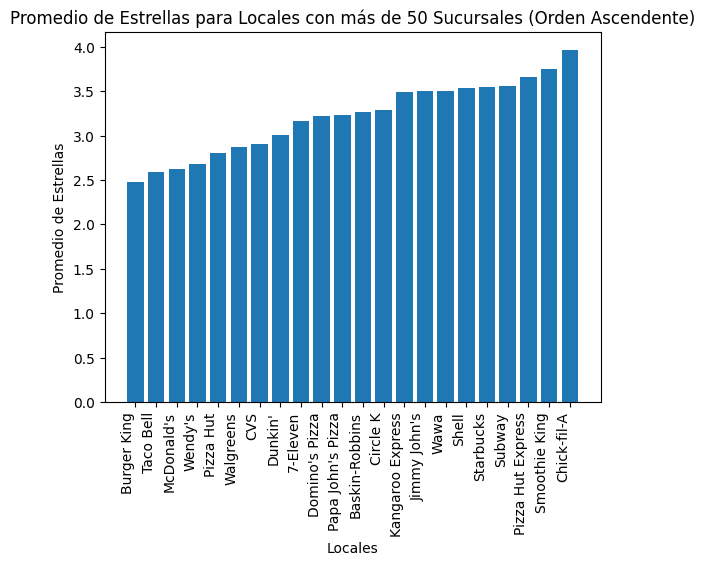

In [10]:
# Agrupar por el nombre del local y calcular el número de sucursales y el promedio de estrellas
agrupado_locales = restaurantes.groupby('nombre').agg({'nombre': 'count', 'avg_rating': 'mean', 'reviews_count': 'sum'})

# Renombrar las columnas resultantes
agrupado_locales.columns = ['num_sucursales', 'promedio_estrellas','total_reviews_count']

# Filtrar los locales con más de 50 sucursales
locales_con_mas_de_50_sucursales = agrupado_locales[agrupado_locales['num_sucursales'] > 50]

# Ordenar en orden ascendente por el promedio de estrellas
locales_con_mas_de_50_sucursales = locales_con_mas_de_50_sucursales.sort_values(by='promedio_estrellas')

# Imprimir el resultado
print(locales_con_mas_de_50_sucursales)

# Graficar el promedio de estrellas para los locales con más de 50 sucursales
plt.bar(locales_con_mas_de_50_sucursales.index, locales_con_mas_de_50_sucursales['promedio_estrellas'])
plt.xlabel('Locales')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas para Locales con más de 50 Sucursales (Orden Ascendente)')
plt.xticks(rotation=90, ha='right')
plt.show()


Vemos el top 10 del promedio de estrellas de los locales con 2 o mas sucursales y ademas la cantidad de reviews count que tienen

In [11]:
agrupado_locales_2 = agrupado_locales[agrupado_locales['num_sucursales'] > 2]

# Ordenar en orden descendente por el promedio de estrellas y tomar los top 10
top10_locales = agrupado_locales_2.nlargest(10, 'promedio_estrellas')

# Imprimir el resultado
print(top10_locales)

                                   num_sucursales  promedio_estrellas  \
nombre                                                                  
Chinese Restaurant                              3            4.833333   
GoJuice                                         3            4.833333   
Grassroots Kava House                           3            4.833333   
Pollos & Jarras                                 3            4.766667   
Jeremiah's Italian Ice                         13            4.738462   
Wild Fork Foods                                 3            4.666667   
Painting with a Twist                          15            4.660000   
Delicious Raw Kitchen & Juice Bar               3            4.633333   
Bolay                                           5            4.600000   
Aroma Espresso Bar                              3            4.566667   

                                   total_reviews_count  
nombre                                                  
Chinese R

Vemos el Not top 10

In [12]:
# Ordenar en orden descendente por el promedio de estrellas y tomar los no top 10
NOtop10_locales = agrupado_locales_2.nsmallest(10, 'promedio_estrellas')

# Imprimir el resultado
print(NOtop10_locales)

                     num_sucursales  promedio_estrellas  total_reviews_count
nombre                                                                      
Shoney's Restaurant               3            1.666667                   99
Walmart Supercenter              25            1.960000                 1247
Rally's                          10            2.000000                  123
Jack in the Box                  20            2.025000                  406
Steak ’n Shake                   17            2.117647                 1188
KFC                              43            2.137209                 4090
Friendly's                        3            2.166667                  102
Orange Leaf                       3            2.166667                   32
Sam's Club                        3            2.166667                   69
Carl's Jr                         5            2.200000                  103


In [13]:
restaurantes.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26436 entries, 0 to 26435
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_restaurante        26436 non-null  int64  
 1   id_ciudad             26436 non-null  int64  
 2   identificador_yelp    11413 non-null  object 
 3   identificador_google  15023 non-null  object 
 4   nombre                26436 non-null  object 
 5   direccion             26436 non-null  object 
 6   latitud               26436 non-null  float64
 7   longitud              26436 non-null  float64
 8   avg_rating            26436 non-null  float64
 9   reviews_count         26436 non-null  int64  
 10  estado                26436 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.2+ MB


Convertimos la columna id_ciudad a tipo str ya que nos traia problemas al graficar


In [14]:
restaurantes['id_ciudad'] = restaurantes['id_ciudad'].astype(str)

Top 5 con mayor promedio de raiting por ciudad // NotTop 5 con peor promedio de raiting por ciudad

C:\Users\leand\AppData\Local\Temp\ipykernel_3484\1205950925.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')
C:\Users\leand\AppData\Local\Temp\ipykernel_3484\1205950925.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')


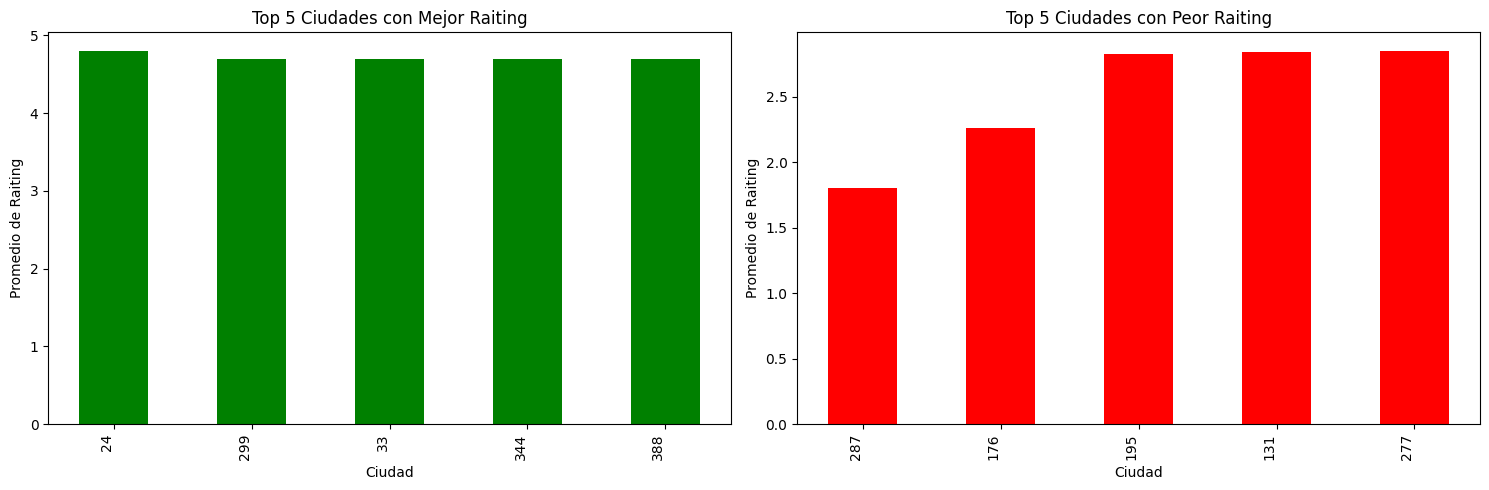

In [15]:
# Agrupar por la ciudad y calcular el promedio de raiting
promedio_raiting_por_ciudad = restaurantes.groupby('id_ciudad')['avg_rating'].mean()

# Ordenar en orden descendente y tomar las top 5 ciudades con mejor raiting
top5_mejores_ciudades = promedio_raiting_por_ciudad.nlargest(5)

# Ordenar en orden ascendente y tomar las top 5 ciudades con peor raiting
top5_peores_ciudades = promedio_raiting_por_ciudad.nsmallest(5)

# Configuración para colocar ambos gráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graficar las 5 ciudades con mejor raiting
axs[0].bar(top5_mejores_ciudades.index, top5_mejores_ciudades.values, color='green', width=0.5)
axs[0].set_xlabel('Ciudad')
axs[0].set_ylabel('Promedio de Raiting')
axs[0].set_title('Top 5 Ciudades con Mejor Raiting')

# Ajustar la rotación de los ticks
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')

# Graficar las 5 ciudades con peor raiting
axs[1].bar(top5_peores_ciudades.index, top5_peores_ciudades.values, color='red', width=0.5)
axs[1].set_xlabel('Ciudad')
axs[1].set_ylabel('Promedio de Raiting')
axs[1].set_title('Top 5 Ciudades con Peor Raiting')

# Ajustar la rotación de los ticks
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')

# Ajustar la disposición para evitar superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Haremos un analisis de los restaurantes que se pueden ofrecer a nuestro cliente

In [16]:
restaurantes[restaurantes['nombre'] == "Bolay"]

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
8192,8265,32,None,0x88d91fb5a11c7a6d:0xf8cc9bb48e3d25d1,Bolay,5030 Champion Blvd G1D #G1D,26.410390,-80.122198,4.6,748,Normally open
8248,8321,332,None,0x88d92f38622622df:0x717e4a2b2b535b34,Bolay,250 S State Rd 7 Suite 100 Suite 100,26.670897,-80.201785,4.6,1161,Normally open
10043,10158,242,None,0x88d9c7d340aac751:0xb24582fcbb2f59b4,Bolay,7880 SW 104th St #101,25.673630,-80.322140,4.7,98,Normally open
10506,10629,393,None,0x88d8d63e68819875:0x92e003228c19c3af,Bolay,1880 Okeechobee Blvd Suite A Suite A,26.705920,-80.080210,4.6,951,Normally open
19223,19398,361,MFQGU55s712P18kplpujIg,None,Bolay,1330 4th St N,27.785854,-82.638764,4.5,25,Normally open


In [17]:
restaurantes[restaurantes['nombre'] == "Kobe Japanese Steakhouse"]

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
7949,8018,2,None,0x88e771e60252bab5:0x79e4f5754c5966c2,Kobe Japanese Steakhouse,468 FL-436,28.661000,-81.400723,4.7,5548,Normally open
9411,9510,37,None,0x88c2ce60cea23af9:0x7be85cf4fdecfa1d,Kobe Japanese Steakhouse,2210 W Brandon Blvd,27.939410,-82.321746,4.5,2425,Normally open
15141,15316,361,HJe8eEH5qXRjQMAh1VfV_w,None,Kobe Japanese Steakhouse,2773 66th St N,27.796953,-82.727831,4.5,91,Normally open


In [18]:
restaurantes[restaurantes['nombre'] == "Joe's Stone Crab Restaurant"]

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
9400,9499,243,None,0x88d9b4f10e788681:0x7a7c53c1c75a3ceb,Joe's Stone Crab Restaurant,11 Washington Ave,25.76916,-80.135151,4.6,6388,Normally open


In [25]:
restaurantes[restaurantes['nombre'] == "Marie Patties"]

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
4881,4915,299,None,0x88d9c418ddf5ab37:0xe7089f45c4f1060a,Marie Patties,9493 SW 160th St,25.619869,-80.346321,4.9,68,Permanently closed


In [19]:
restaurantes[restaurantes['nombre'] == "Shoney's Restaurant"]

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
15532,15707,212,4PfDVXUiHTslBmKpp1Ckiw,None,Shoney's Restaurant,2645 McGavock Pike,36.217842,-86.694037,1.5,46,Normally open
21330,21505,212,2OcYrGeyIhR_ODtl1xVf-Q,None,Shoney's Restaurant,407 Thompson Ln,36.110648,-86.746319,2.0,25,Normally open
21790,21965,396,Kv3rJDB3LYAF8a4X0f6TIg,None,Shoney's Restaurant,307 Long Hollow Pike,36.325630,-86.700406,1.5,28,Normally open


Vemos locales que tengan muchas reviews

In [20]:
restaurantes[restaurantes['reviews_count'] >= 5000]

,id_restaurante,id_ciudad,identificador_yelp,identificador_google,nombre,direccion,latitud,longitud,avg_rating,reviews_count,estado
7949,8018,2,None,0x88e771e60252bab5:0x79e4f5754c5966c2,Kobe Japanese Steakhouse,468 FL-436,28.661000,-81.400723,4.7,5548,Normally open
8735,8813,285,None,0x88e77c4f6fd3334b:0x7ddfab24aa1a94c4,El Palacio Buffet,7403 S Orange Blossom Trl #5709,28.458372,-81.398211,4.2,5321,Normally open
9400,9499,243,None,0x88d9b4f10e788681:0x7a7c53c1c75a3ceb,Joe's Stone Crab Restaurant,11 Washington Ave,25.769160,-80.135151,4.6,6388,Normally open
9447,9546,111,None,0x88d9a031f44c35d5:0xd9e6f545d08ec667,Everglades Holiday Park Airboat Tours and Rides,21940 Griffin Rd,26.060475,-80.444703,4.4,7664,Normally open
9512,9613,13,None,0x88d9ac593d9be06d:0x7571ded5edc4f9ba,CVI.CHE 105,19565 Biscayne Blvd #954,25.957895,-80.141487,4.8,6882,Normally open
9532,9634,83,None,0x88e6da145a48ad3b:0x4d543199cd39f64b,Joe's Crab Shack,1200 Main St,29.227359,-81.005629,4.1,5678,Normally open
9710,9816,308,None,0x8890a84997a3ca01:0xb5c7b6fa2bbf6d9e,Flora-Bama,17401 Perdido Key Dr,30.281301,-87.518178,4.5,7471,Normally open
10106,10226,308,None,0x8890c63dae1c2e73:0x1482c825e7f0d0ae,Peg Leg Pete's,1010 Fort Pickens Rd,30.328181,-87.164446,4.6,6398,Normally open
10210,10330,285,None,0x88e77ea893b83cbf:0x8c5b51fd6bb065be,The Cheesecake Factory,4200 Conroy Rd,28.486003,-81.431334,4.5,7470,Normally open
10247,10367,136,None,0x8890c5e0603d5c35:0xa888fc76928559ca,Flounder's Chowder House,800 Quietwater Beach Rd,30.334160,-87.139854,4.5,5824,Normally open


Hacemos un pequeño analisis de la ciudad de Miami para ver donde se puede invertir

In [21]:
miami = restaurantes[restaurantes['id_ciudad'] == '242']

In [22]:
miami.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 3 to 25509
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_restaurante        1253 non-null   int64  
 1   id_ciudad             1253 non-null   object 
 2   identificador_yelp    43 non-null     object 
 3   identificador_google  1210 non-null   object 
 4   nombre                1253 non-null   object 
 5   direccion             1253 non-null   object 
 6   latitud               1253 non-null   float64
 7   longitud              1253 non-null   float64
 8   avg_rating            1253 non-null   float64
 9   reviews_count         1253 non-null   int64  
 10  estado                1253 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 117.5+ KB


In [23]:
# Agrupar por el nombre del local y calcular el número de sucursales y el promedio de estrellas
agrupado_locales = miami.groupby('nombre').agg({'nombre': 'count', 'avg_rating': 'mean', 'reviews_count': 'sum'})

# Renombrar las columnas resultantes
agrupado_locales.columns = ['num_sucursales', 'promedio_estrellas','total_reviews_count']

# Filtrar los locales con más de 50 sucursales
locales_con_mas_de_50_sucursales = agrupado_locales[agrupado_locales['num_sucursales'] > 50]

# Ordenar en orden ascendente por el promedio de estrellas
locales_con_mas_de_50_sucursales = locales_con_mas_de_50_sucursales.sort_values(by='promedio_estrellas')

# Imprimir el resultado
print(locales_con_mas_de_50_sucursales)

Empty DataFrame
Columns: [num_sucursales, promedio_estrellas, total_reviews_count]
Index: []


In [24]:
# Ordenar en orden descendente por el promedio de estrellas y tomar los top 10
NOtop10_locales = agrupado_locales_2.nsmallest(10, 'promedio_estrellas')

# Imprimir el resultado
print(NOtop10_locales)

                     num_sucursales  promedio_estrellas  total_reviews_count
nombre                                                                      
Shoney's Restaurant               3            1.666667                   99
Walmart Supercenter              25            1.960000                 1247
Rally's                          10            2.000000                  123
Jack in the Box                  20            2.025000                  406
Steak ’n Shake                   17            2.117647                 1188
KFC                              43            2.137209                 4090
Friendly's                        3            2.166667                  102
Orange Leaf                       3            2.166667                   32
Sam's Club                        3            2.166667                   69
Carl's Jr                         5            2.200000                  103
